## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: A549

da fare 
- sistema selezione augmentation in embracenet
- crea grafici AUPRC reti

In [4]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [6]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [7]:
cell_line = CELL_LINES[0]
cell_line

'A549'

---

In [8]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [9]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV

In [7]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

In [29]:
from BIOINF_tesi.visual import print_content_results_dict

In [32]:
print_content_results_dict(models='ConcatNetMultimodal')

A549

active_E_vs_inactive_E
ConcatNetMultimodal

active_P_vs_inactive_P
ConcatNetMultimodal

active_E_vs_active_P
ConcatNetMultimodal

inactive_E_vs_inactive_P
ConcatNetMultimodal

active_EP_vs_inactive_rest
ConcatNetMultimodal


GM12878

active_E_vs_inactive_E
ConcatNetMultimodal

active_P_vs_inactive_P
ConcatNetMultimodal

active_E_vs_active_P
ConcatNetMultimodal

inactive_E_vs_inactive_P
ConcatNetMultimodal

active_EP_vs_inactive_rest
ConcatNetMultimodal


H1

active_E_vs_inactive_E
ConcatNetMultimodal

active_P_vs_inactive_P
ConcatNetMultimodal

active_E_vs_active_P
ConcatNetMultimodal

inactive_E_vs_inactive_P
ConcatNetMultimodal

active_EP_vs_inactive_rest
ConcatNetMultimodal


HEK293

active_E_vs_inactive_E
ConcatNetMultimodal

active_P_vs_inactive_P
ConcatNetMultimodal

active_E_vs_active_P
ConcatNetMultimodal

inactive_E_vs_inactive_P
ConcatNetMultimodal

active_EP_vs_inactive_rest
ConcatNetMultimodal


HEPG2

active_E_vs_inactive_E

active_P_vs_inactive_P

active_E_vs_active

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [7]:
task = TASKS[0]
task

'active_E_vs_inactive_E'

In [8]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


### 1. FFNN

In [10]:
model=FFNN

In [11]:
# IMBALANCED
type_augm_genfeatures = 'smote'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:10,342] Using an existing study with name 'A549_active_E_vs_inactive_E_FFNN_smote_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1104619151157415
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    lr: 0.001097056625573127
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 128
    optimizer: RMSprop
    weight_decay: 0.00011650436869019969

===============> MODEL TESTING
AUPRC test score: 0.12271190879786972


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:11,181] Using an existing study with name 'A549_active_E_vs_inactive_E_FFNN_smote_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.12463288994383959
  Params: 
    dropout_l0: 0.2
    lr: 0.029927035852373256
    n_layers: 1
    n_units_l0: 128
    optimizer: Nadam
    weight_decay: 0.0009033349332847114

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:11,767] Using an existing study with name 'A549_active_E_vs_inactive_E_FFNN_smote_1_2_3' instead of creating a new one.


AUPRC test score: 0.12639365042112455


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.13300132202619236
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.2
    lr: 0.01807055123024261
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 16
    optimizer: Adam
    weight_decay: 0.009312825613933257

===============> MODEL TESTING
AUPRC test score: 0.13466746340353447



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.12792


In [12]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

In [14]:
# IMBALANCED
type_augm_genfeatures = 'double'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST.pt')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:12,384] Using an existing study with name 'A549_active_E_vs_inactive_E_FFNN_double_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:12,632] Using an existing study with name 'A549_active_E_vs_inactive_E_FFNN_double_1_2' instead of creating a new one.


  Value:  0.05391725352112676
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.2
    dropout_l2: 0.5
    lr: 1.0983325391724808e-05
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 64
    n_units_l2: 32
    optimizer: Adam
    weight_decay: 0.012593397824097607

===============> MODEL TESTING
AUPRC test score: 0.056822244289970215


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.12934782150126778
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    dropout_l2: 0.5
    lr: 0.0012356621790988436
    n_layers: 3
    n_units_l0: 32
    n_units_l1: 32
    n_units_l2: 64
    optimizer: Nadam
    weight_decay: 0.00023871320625855856

===============> MODEL TESTING
AUPRC test score: 0.12324254660081528


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:12,949] Using an existing study with name 'A549_active_E_vs_inactive_E_FFNN_double_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.12512212416605387
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.4
    lr: 0.00038094724114862063
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 16
    optimizer: Adam
    weight_decay: 0.00019765704708958178

===============> MODEL TESTING
AUPRC test score: 0.12444609939833287



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.1015


In [15]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [16]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [10]:
model=CNN

In [11]:
# IMBALANCED
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:37:43,397] Using an existing study with name 'A549_active_E_vs_inactive_E_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/conda/lib/python3.7/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.06671030052771904
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0
    kernel_size_l0: 5
    kernel_size_l1: 15
    lr: 0.002492549875641731
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 16
    out_channels_l1: 96
    weight_decay: 0.05400548483737392

===============> MODEL TESTING
AUPRC test score: 0.056770109235352535




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:37:46,521] Using an existing study with name 'A549_active_E_vs_inactive_E_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.07353027134563184
  Params: 
    dropout_l0: 0
    dropout_l1: 0.4
    kernel_size_l0: 15
    kernel_size_l1: 5
    lr: 0.003187423399350215
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 64
    out_channels_l1: 64
    weight_decay: 0.010152542998255033

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:37:47,152] Using an existing study with name 'A549_active_E_vs_inactive_E_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.06519933360703083


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.07250059734214663
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0.4
    dropout_l3: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 11
    kernel_size_l2: 15
    kernel_size_l3: 5
    lr: 0.0010533905245534373
    n_layers: 4
    optimizer: Nadam
    out_channels_l0: 16
    out_channels_l1: 64
    out_channels_l2: 96
    out_channels_l3: 512
    weight_decay: 0.07991688720405098

===============> MODEL TESTING
AUPRC test score: 0.05836395233366432



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.06011


In [12]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [9]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [10]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---

### 1. FFNN

In [19]:
model=FFNN

In [20]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:16,244] Using an existing study with name 'A549_active_P_vs_inactive_P_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.19903904786634632
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    dropout_l2: 0.5
    dropout_l3: 0.4
    lr: 0.020901849386777135
    n_layers: 4
    n_units_l0: 32
    n_units_l1: 16
    n_units_l2: 32
    n_units_l3: 4
    optimizer: Adam
    weight_decay: 0.0010203527584796907

===============> MODEL TESTING
AUPRC test score: 0.22220328552871912


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:16,550] Using an existing study with name 'A549_active_P_vs_inactive_P_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:17,048] Using an existing study with name 'A549_active_P_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.25376076533032893
  Params: 
    dropout_l0: 0.0
    lr: 1.740877142904875e-05
    n_layers: 1
    n_units_l0: 128
    optimizer: Nadam
    weight_decay: 0.0001331936589151034

===============> MODEL TESTING
AUPRC test score: 0.24066715059001012


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.24954454578797594
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    lr: 0.0005265358802000174
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 128
    optimizer: RMSprop
    weight_decay: 0.0002146978469010751

===============> MODEL TESTING
AUPRC test score: 0.25847668299164656



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.24045


In [21]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [22]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [16]:
model=CNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:37:55,021] Using an existing study with name 'A549_active_P_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.18273752343785848
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    kernel_size_l0: 5
    kernel_size_l1: 11
    lr: 6.581272290135745e-05
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 64
    weight_decay: 0.0006137804736567615

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:37:55,363] Using an existing study with name 'A549_active_P_vs_inactive_P_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.19503897469253328


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.18840931902263708
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    kernel_size_l0: 5
    kernel_size_l1: 11
    lr: 1.7628967520980997e-05
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 32
    weight_decay: 0.0006201936675350008

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:37:55,811] Using an existing study with name 'A549_active_P_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.1907454524469494


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.18569023842685717
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0
    kernel_size_l0: 11
    kernel_size_l1: 15
    lr: 0.0011673180152785819
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 96
    weight_decay: 0.012785315175687432

===============> MODEL TESTING
AUPRC test score: 0.19543550008918104



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.19374


In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [11]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [12]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [25]:
model=FFNN

In [26]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:21,869] Using an existing study with name 'A549_active_E_vs_active_P_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.6303965263864644
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.2
    lr: 0.00017917249644157403
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 128
    optimizer: RMSprop
    weight_decay: 0.00028695750658948944

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:22,156] Using an existing study with name 'A549_active_E_vs_active_P_FFNN_1_2' instead of creating a new one.


AUPRC test score: 0.6987997965001465


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:22,304] Using an existing study with name 'A549_active_E_vs_active_P_FFNN_1_2_3' instead of creating a new one.


  Value:  0.6857677698474068
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.3
    lr: 0.014149872504655773
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 64
    optimizer: Adam
    weight_decay: 0.0019782466208337363

===============> MODEL TESTING
AUPRC test score: 0.648053113833866


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.6967717638136919
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.3
    lr: 0.08124221456115621
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 128
    optimizer: Adam
    weight_decay: 0.0013895121952656438

===============> MODEL TESTING
AUPRC test score: 0.6832361698069489



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.6767


In [27]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [28]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [22]:
model=CNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:00,600] Using an existing study with name 'A549_active_E_vs_active_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5907730514883093
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    kernel_size_l0: 15
    kernel_size_l1: 5
    lr: 0.0002075881270271377
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 96
    weight_decay: 0.0022148936628602002

===============> MODEL TESTING
AUPRC test score: 0.6564181982824108




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:01,476] Using an existing study with name 'A549_active_E_vs_active_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.6022678317974148
  Params: 
    dropout_l0: 0
    kernel_size_l0: 11
    lr: 0.0005568882336287384
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 16
    weight_decay: 0.007168711522114368

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:01,877] Using an existing study with name 'A549_active_E_vs_active_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.6782589514404268


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.6304423926366542
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    kernel_size_l0: 15
    kernel_size_l1: 11
    lr: 0.0009214251171952463
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 96
    weight_decay: 0.00030578141855603757

===============> MODEL TESTING
AUPRC test score: 0.6385317881614837



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.65774


In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [13]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [14]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [31]:
model=FFNN

In [32]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:26,986] Using an existing study with name 'A549_inactive_E_vs_inactive_P_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5815308452659506
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.4
    lr: 0.001242468988598542
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 64
    optimizer: Nadam
    weight_decay: 0.000436868969513897

===============> MODEL TESTING
AUPRC test score: 0.5777724412956468


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:27,390] Using an existing study with name 'A549_inactive_E_vs_inactive_P_FFNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5633373261293123
  Params: 
    dropout_l0: 0.3
    lr: 7.115839459066734e-05
    n_layers: 1
    n_units_l0: 128
    optimizer: Nadam
    weight_decay: 0.001775624783354186

===============> MODEL TESTING
AUPRC test score: 0.5602804423405524


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:27,863] Using an existing study with name 'A549_inactive_E_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5762618365312707
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.0
    lr: 0.0008125095919068666
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 128
    optimizer: RMSprop
    weight_decay: 0.0006579984732720696

===============> MODEL TESTING
AUPRC test score: 0.576765637262877



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.57161


In [33]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [34]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [28]:
model=CNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:07,012] Using an existing study with name 'A549_inactive_E_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5760663763670382
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    kernel_size_l0: 5
    kernel_size_l1: 5
    lr: 0.00037378373926965676
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 32
    weight_decay: 0.0019414154771545153

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:07,625] Using an existing study with name 'A549_inactive_E_vs_inactive_P_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.5864192948037895


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5639809297465003
  Params: 
    dropout_l0: 0
    dropout_l1: 0.4
    dropout_l2: 0
    kernel_size_l0: 11
    kernel_size_l1: 5
    kernel_size_l2: 5
    lr: 0.0008113426985655316
    n_layers: 3
    optimizer: Nadam
    out_channels_l0: 64
    out_channels_l1: 96
    out_channels_l2: 96
    weight_decay: 0.05459213463084904

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:08,122] Using an existing study with name 'A549_inactive_E_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.5719893161752271


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5888828656642322
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 11
    lr: 3.0731683605684234e-05
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 32
    weight_decay: 0.014016142066702372

===============> MODEL TESTING
AUPRC test score: 0.5942429027008511



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.58422


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [15]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [16]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [37]:
model=FFNN

In [38]:
# IMBALANCED
type_augm_genfeatures = 'smote'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:33,843] Using an existing study with name 'A549_active_EP_vs_inactive_rest_FFNN_smote_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.20278462527912003
  Params: 
    dropout_l0: 0.4
    lr: 0.02263686396399387
    n_layers: 1
    n_units_l0: 256
    optimizer: Adam
    weight_decay: 0.0005247513472911305

===============> MODEL TESTING
AUPRC test score: 0.18936414406305663


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:39,366] Using an existing study with name 'A549_active_EP_vs_inactive_rest_FFNN_smote_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2122926600892612
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.2
    dropout_l2: 0.0
    lr: 0.00011136452148676387
    n_layers: 3
    n_units_l0: 128
    n_units_l1: 16
    n_units_l2: 64
    optimizer: RMSprop
    weight_decay: 0.00014181580247884238

===============> MODEL TESTING
AUPRC test score: 0.2136426215518898


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:44,259] Using an existing study with name 'A549_active_EP_vs_inactive_rest_FFNN_smote_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.21244080537903004
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.2
    lr: 0.001519200069741656
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 16
    optimizer: Nadam
    weight_decay: 0.00019606324784726323

===============> MODEL TESTING
AUPRC test score: 0.21659924356006963



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.20654


In [39]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [40]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

In [41]:
# IMBALANCED
type_augm_genfeatures = 'double'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:47,245] Using an existing study with name 'A549_active_EP_vs_inactive_rest_FFNN_double_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.202956730272889
  Params: 
    dropout_l0: 0.4
    lr: 0.0004994345448050721
    n_layers: 1
    n_units_l0: 64
    optimizer: RMSprop
    weight_decay: 0.006842066689455926

===============> MODEL TESTING
AUPRC test score: 0.20036044261656757


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:47,597] Using an existing study with name 'A549_active_EP_vs_inactive_rest_FFNN_double_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2271325773157029
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.4
    lr: 0.04869662228518287
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 16
    optimizer: Adam
    weight_decay: 0.00011866046687933148

===============> MODEL TESTING
AUPRC test score: 0.19958353411338703


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 08:52:48,261] Using an existing study with name 'A549_active_EP_vs_inactive_rest_FFNN_double_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.21977325299399195
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.3
    dropout_l2: 0.0
    lr: 0.002819828529427939
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 32
    n_units_l2: 32
    optimizer: Adam
    weight_decay: 0.0003684867515181342

===============> MODEL TESTING
AUPRC test score: 0.21495425638046486



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.20497


In [42]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [43]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [34]:
model=CNN

In [38]:
# IMBALANCED
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:25,279] Using an existing study with name 'A549_active_EP_vs_inactive_rest_CNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.14372508208904314
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    dropout_l2: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 15
    kernel_size_l2: 15
    lr: 0.00011225256307637438
    n_layers: 3
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 64
    out_channels_l2: 64
    weight_decay: 0.022471260724093313

===============> MODEL TESTING
AUPRC test score: 0.15808317888679663


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:25,991] Using an existing study with name 'A549_active_EP_vs_inactive_rest_CNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.15414174923759058
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.5
    dropout_l2: 0.5
    dropout_l3: 0.4
    kernel_size_l0: 11
    kernel_size_l1: 15
    kernel_size_l2: 15
    kernel_size_l3: 15
    lr: 0.0011837942258440628
    n_layers: 4
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 96
    out_channels_l2: 64
    out_channels_l3: 128
    weight_decay: 0.0007216288878670173

===============> MODEL TESTING
AUPRC test score: 0.15534093185276715


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 18:38:26,540] Using an existing study with name 'A549_active_EP_vs_inactive_rest_CNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  6
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.16006682488349847
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    dropout_l2: 0.5
    dropout_l3: 0.5
    kernel_size_l0: 15
    kernel_size_l1: 15
    kernel_size_l2: 15
    kernel_size_l3: 5
    lr: 0.00034665706509859866
    n_layers: 4
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 32
    out_channels_l2: 256
    out_channels_l3: 512
    weight_decay: 0.006522553452181734

===============> MODEL TESTING
AUPRC test score: 0.12690914560097605



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.14678


In [39]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [40]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

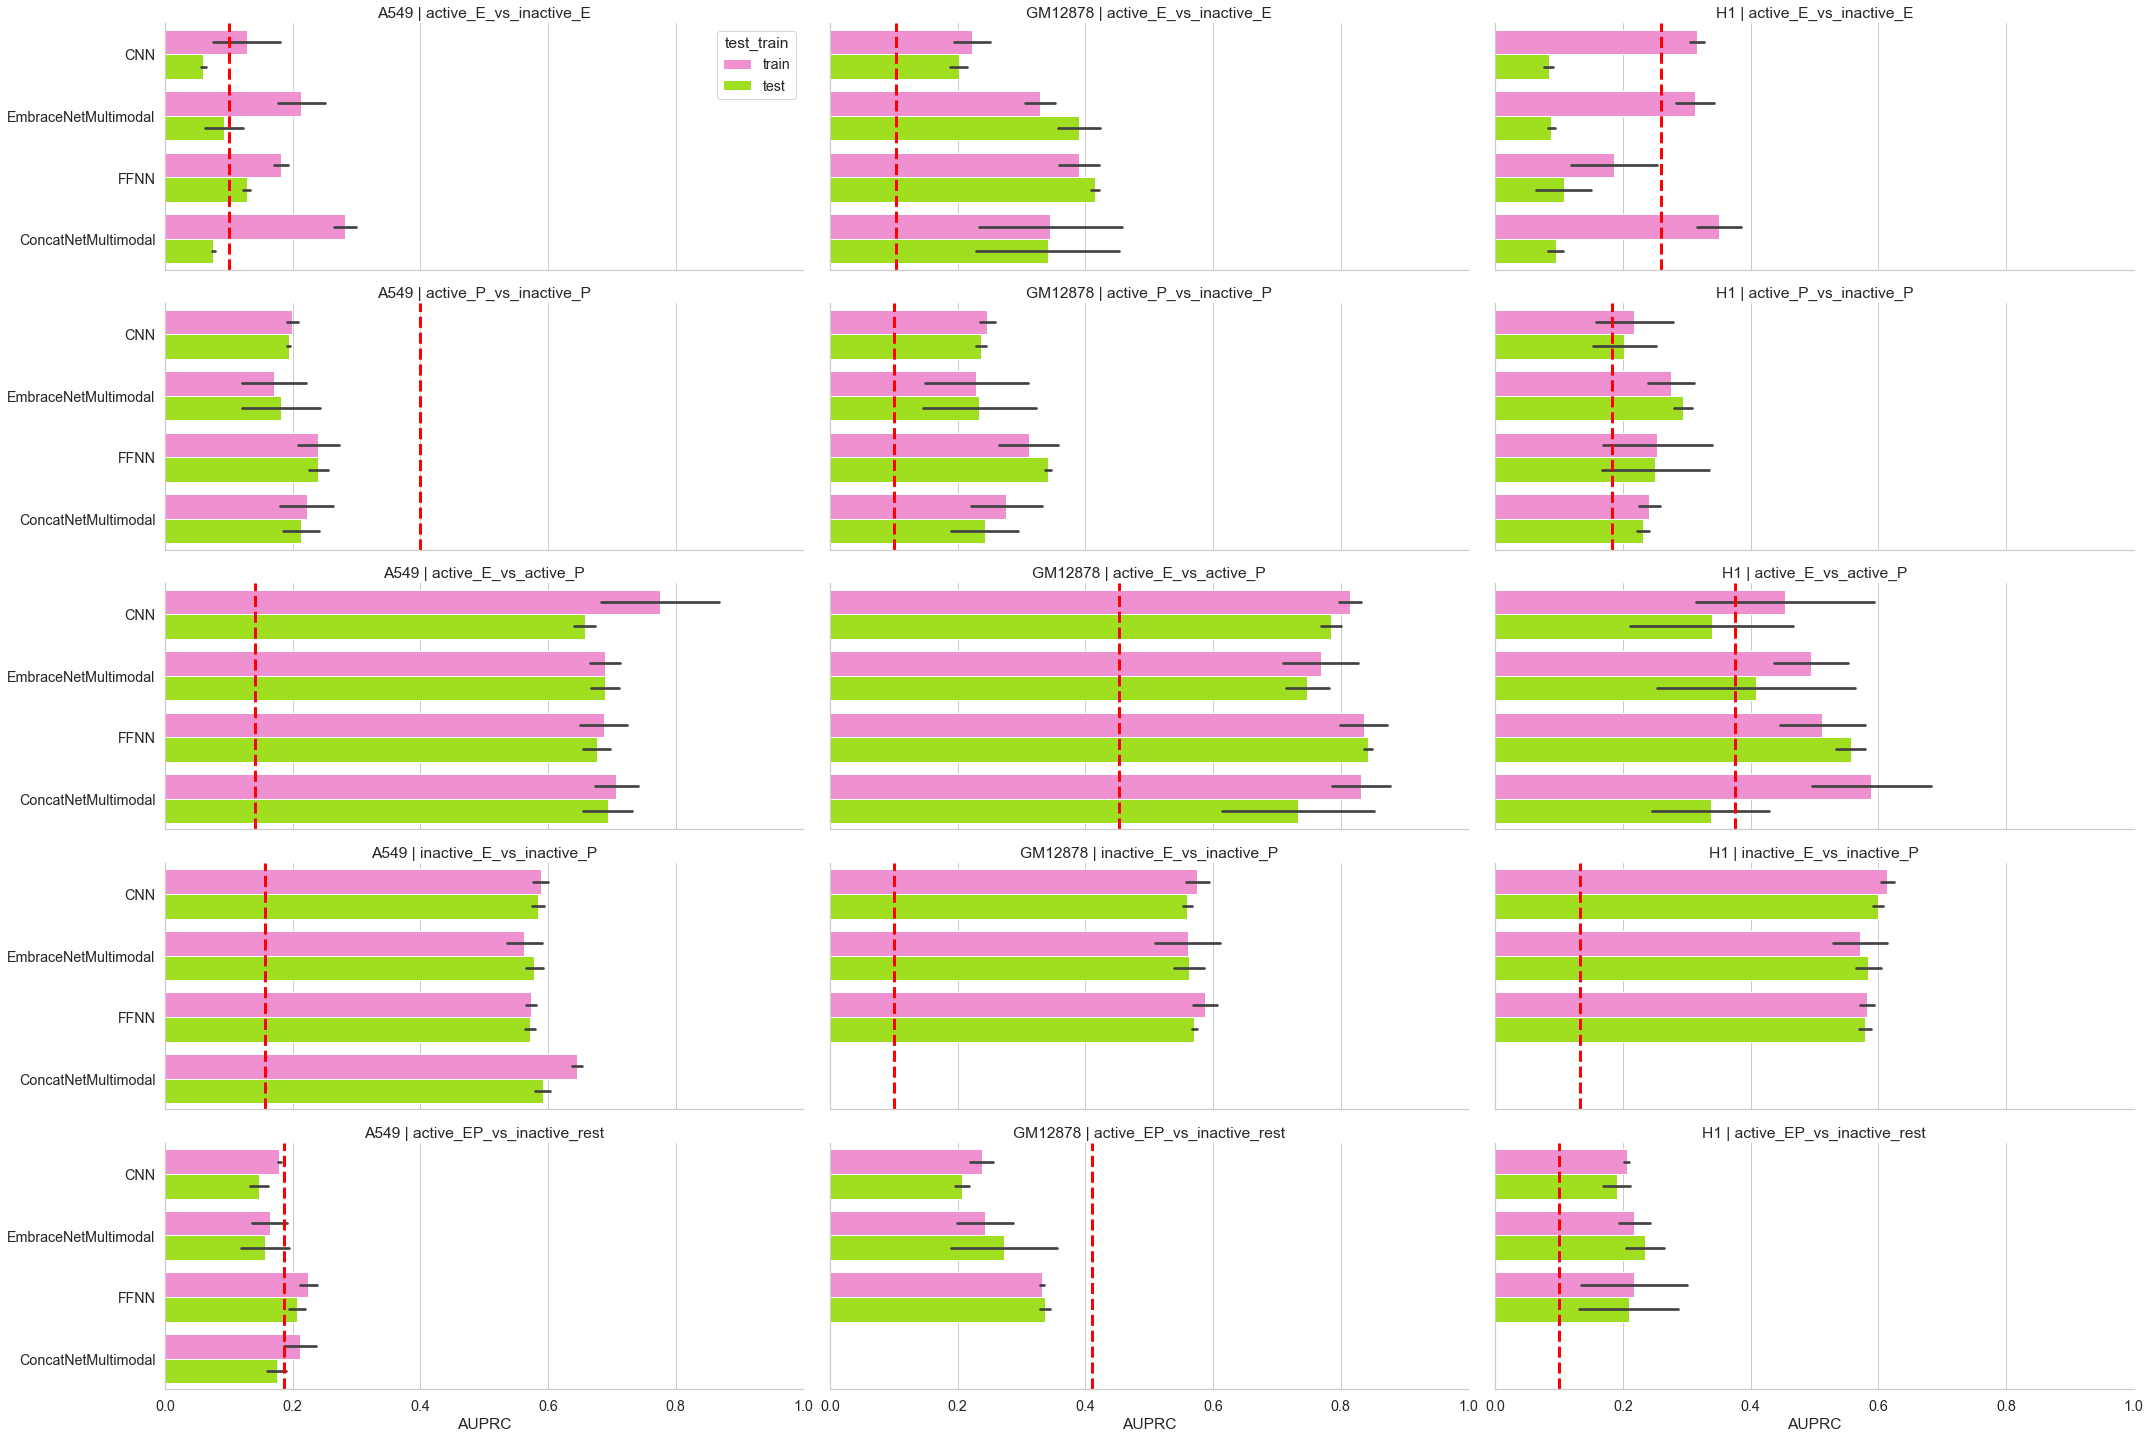

In [1]:
from BIOINF_tesi.visual import plot_scores
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS
plot_scores(cells=CELL_LINES[:3], models=['FFNN','CNN', 'EmbraceNetMultimodal', 'ConcatNetMultimodal'])

In [1]:
from BIOINF_tesi.visual import get_average_AUPRC_df

In [3]:
df = get_average_AUPRC_df(models=['FFNN','CNN','EmbraceNetMultimodal','ConcatNetMultimodal'])

In [5]:
for model in df.keys():
    print(model)
    display(df[model])

FFNN


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
A549,0.12792,0.24045,0.6767,0.57161,0.20654
GM12878,0.41504,0.34183,0.84293,0.57068,0.33679
H1,0.10707,0.25076,0.55682,0.57934,0.20899
HEK293,0.16061,0.31227,0.81008,0.57137,0.24144
HEPG2,0.28586,0.35415,0.77376,0.59477,0.31254
K562,0.16987,0.35191,0.80136,0.57487,0.21239
MCF7,0.13679,0.32739,0.76352,0.57257,0.21045


CNN


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
A549,0.06011,0.19374,0.65774,0.58422,0.14678
GM12878,0.20147,0.23723,0.78504,0.55978,0.20721
H1,0.08377,0.20219,0.33909,0.5997,0.19009
HEK293,0.11423,0.24028,0.60146,0.45543,0.20859
HEPG2,0.12415,0.24769,0.68355,0.57477,0.19717
K562,0.09604,0.24245,0.64967,0.56412,0.16921
MCF7,NaN,NaN,NaN,NaN,NaN


EmbraceNetMultimodal


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
A549,0.09301,0.18169,0.68973,0.57851,0.15695
GM12878,0.39003,0.23404,0.74794,0.56198,0.27255
H1,0.08783,0.29423,0.40921,0.58471,0.23451
HEK293,0.12506,0.24603,0.78331,0.58511,0.20273
HEPG2,0.12313,0.28192,0.57915,0.57384,0.17412
K562,0.10981,0.33587,0.76434,0.57377,0.17803
MCF7,0.08383,0.25756,0.54421,0.59234,0.17586


ConcatNetMultimodal


,active_E_vs_inactive_E,active_P_vs_inactive_P,active_E_vs_active_P,inactive_E_vs_inactive_P,active_EP_vs_inactive_rest
A549,0.07598,0.21349,0.69375,0.59152,0.17485
GM12878,0.34071,0.24199,0.73271,NaN,NaN
H1,0.0948,0.2321,0.33734,NaN,NaN
HEK293,0.12869,0.24035,0.74639,NaN,NaN
HEPG2,NaN,NaN,NaN,NaN,NaN
K562,NaN,NaN,NaN,NaN,NaN
MCF7,NaN,NaN,NaN,NaN,NaN
